# Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
# загружаю данные в датафрейм
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data_class = iris.target

In [17]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
data.drop(data.columns[[2,3]], axis='columns').head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [19]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# разделяю выборку на тренировочную и тестовую с выборкой 25% -test_size = 0.25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size = 0.25)

In [21]:
# импортирую LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
lda = LinearDiscriminantAnalysis()

In [23]:
# обучаю данные при помощи .fit
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score

In [29]:
# расчет точности разделения(сбалансированности)получился уж сильно идеальный
accuracy_score(y_test, lda.predict(X_test))

1.0

In [32]:
# нахожу коэффициенты дискриминатных линий по трем классам с четырьмя параметрами
lda.coef_

array([[  4.57843557,  13.68696419, -14.74881039, -21.79873115],
       [ -1.49583997,  -3.925828  ,   3.7494483 ,   2.94500997],
       [ -2.68177596,  -8.57727512,   9.73631263,  17.05526846]])

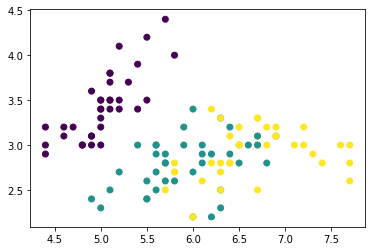

In [33]:
# визуализирую дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c = y_train)
plt.show()

In [34]:
# оставляю только две группы
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

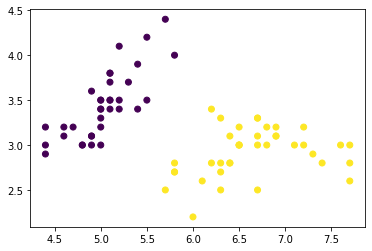

In [35]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c = sy_train)
plt.show()

In [36]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [38]:
# нахожу центры классов(отображаются центроиды каждого класса)
lda_small.means_

array([[5.03142857, 3.44285714],
       [6.65      , 2.92105263]])

In [42]:
# получаю,что ширина наружной доли важнее длины при классификации(если я правильно понял)
lda_small.coef_

array([[ 11.69842608, -12.58171575]])

In [43]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

0.9629629629629629

In [53]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

### Подбираю оптимальное число кластеров для алгоритма kmeans и визуализирую полученную кластеризацию

In [88]:
scaler = StandardScaler()

In [89]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(small_train)

In [90]:
from sklearn.cluster import KMeans

In [97]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters = 2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0])

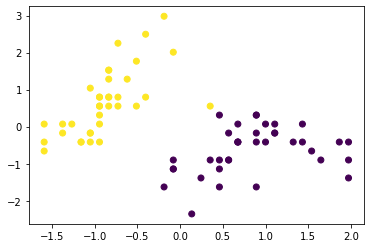

In [98]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = clusters )
plt.show()

In [99]:
# визуализирую четыре кластера
kmeans = KMeans(n_clusters = 4)

clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 1, 2, 1, 0, 1, 1, 3, 2, 3, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 3, 0, 0, 1, 3, 1, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0, 1, 3, 0, 0,
       2, 0, 0, 1, 1, 2, 1, 3, 3, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 3,
       0, 1, 2, 1, 0, 0, 0])

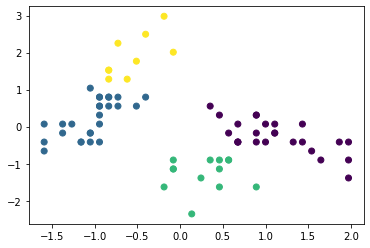

In [100]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = clusters )
plt.show()

### Оптимальное число кластеров -два.   Вместе с тем для более детальной классификации можно использовать четыре кластера